In [33]:
from wayback import Mode,WaybackClient
from scrapy.selector import Selector
import json,re,pandas as pd

#client = WaybackClient()
url = "https://www.kickstarter.com/projects/elanlee/exploding-kittens"
url = "https://www.kickstarter.com/projects/gamesalute/poseidons-kingdom-limited-2nd-edition"

def get_wayback_snapshots(url):
    with WaybackClient() as client:
        snapshots = pd.DataFrame()
        for record in client.search(url):
            try:
                memento = client.get_memento(record, mode=Mode.original)
                content = memento.content.decode()
                response = Selector(text=content)
                script_content = response.xpath('//script[contains(text(),"window.current_project")]').get()
                string = re.search(r'window\.current_project\s*=\s*"(.*?)";', script_content, re.DOTALL).group(1)
                escaped = string.replace("&quot;",'"')
                snapshot = pd.DataFrame(index=[record.timestamp],data=[json.loads(escaped.replace(r'\\"',"'"))])
                print(f"{record.timestamp} | {url}")
                snapshots = pd.concat([snapshots,snapshot])
            except Exception as e:
                print(e,response)
        return snapshots
snapshots = get_wayback_snapshots(url)

2015-03-29 08:46:57+00:00 | https://www.kickstarter.com/projects/gamesalute/poseidons-kingdom-limited-2nd-edition
2020-11-12 03:02:43+00:00 | https://www.kickstarter.com/projects/gamesalute/poseidons-kingdom-limited-2nd-edition


In [31]:
pd.DataFrame(snapshots)

,id,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,...,current_currency,usd_type,spotlight,add_ons,items,prelaunch_activated,display_prelaunch,available_card_types,supports_addons,addons_pledge_url
2015-03-29 08:46:57+00:00,229244919,Poseidon&#39;s Kingdom Limited 2nd Edition,Limited 2nd Edition of the popular and hard-to...,20000.0,42001.0,successful,poseidons-kingdom-limited-2nd-edition,False,US,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-12 03:02:43+00:00,229244919,Poseidon&#39;s Kingdom Limited 2nd Edition,Limited 2nd Edition of the popular and hard-to...,20000.0,42001.0,successful,poseidons-kingdom-limited-2nd-edition,False,US,USD,...,USD,international,True,[],[],False,False,"[VISA, MASTERCARD, AMEX, DISCOVER, JCB, DINERS...",False,https://www.kickstarter.com/projects/gamesalut...


In [34]:
flatten

NameError: name 'flatten' is not defined

In [ ]:
df = snapshots.copy()
#df.timestamp = pd.to_datetime(df.timestamp,utc=False)
df.launched_at = pd.to_datetime(df.launched_at,unit='s').astype("datetime64")
df.created_at = pd.to_datetime(df.created_at,unit='s').astype("datetime64")
df.deadline = pd.to_datetime(df.deadline,unit='s').astype("datetime64")
df = df.set_index('timestamp').sort_index()
start = df.created_at.min()
end = df.deadline.max()
goal = df.goal.max()
df = df[start:end]
df

/var/folders/sl/9w5nn42568jd3p4mbkq02cs00000gn/T/ipykernel_14105/792904733.py:3: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df.launched_at = pd.to_datetime(df.launched_at,unit='s').astype("datetime64")
/var/folders/sl/9w5nn42568jd3p4mbkq02cs00000gn/T/ipykernel_14105/792904733.py:4: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df.created_at = pd.to_datetime(df.created_at,unit='s').astype("datetime64")
/var/folders/sl/9w5nn42568jd3p4mbkq02cs00000gn/T/ipykernel_14105/792904733.py:5: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df.deadline = pd.to_datetime(df.deadline,unit='s').astype("datetime64")
/var/folders/sl/9w5nn42568jd3p4mbkq02cs00000gn/T/ipykernel_14105/792904733.py:10: FutureWarning: Index

,title,status,goal,pledged,backers,created_at,launched_at,deadline
timestamp,,,,,,,,
2015-01-20 23:35:13+00:00,Exploding Kittens,live,10000.0,877853.00,22851,2014-12-15 08:39:54,2015-01-20 18:00:19,2015-02-20 02:00:00
2015-01-21 04:47:22+00:00,Exploding Kittens,live,10000.0,1384423.16,36234,2014-12-15 08:39:54,2015-01-20 18:00:19,2015-02-20 02:00:00
2015-01-22 03:30:05+00:00,Exploding Kittens,live,10000.0,2443746.46,62800,2014-12-15 08:39:54,2015-01-20 18:00:19,2015-02-20 02:00:00
2015-01-22 05:45:03+00:00,Exploding Kittens,live,10000.0,2494081.46,64117,2014-12-15 08:39:54,2015-01-20 18:00:19,2015-02-20 02:00:00
2015-01-22 06:11:05+00:00,Exploding Kittens,live,10000.0,2501692.46,64319,2014-12-15 08:39:54,2015-01-20 18:00:19,2015-02-20 02:00:00
2015-01-23 01:14:55+00:00,Exploding Kittens,live,10000.0,3000297.99,76880,2014-12-15 08:39:54,2015-01-20 18:00:19,2015-02-20 02:00:00
2015-02-17 03:51:27+00:00,Exploding Kittens,live,10000.0,6686143.92,167852,2014-12-15 08:39:54,2015-01-20 18:00:19,2015-02-20 02:00:00


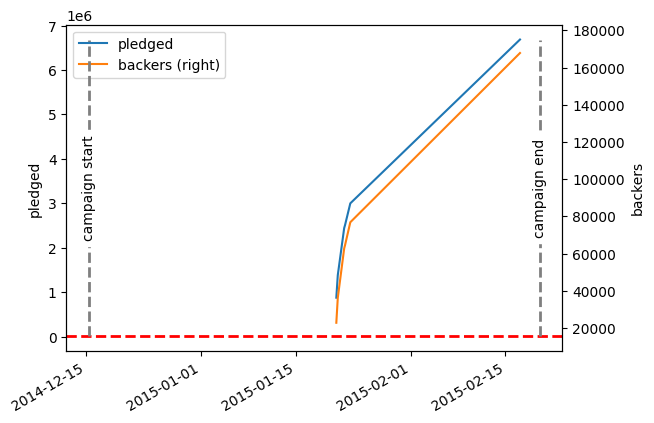

In [ ]:
import matplotlib.pyplot as plt

pledged = df.pledged.plot(legend=True,xlabel="",ylabel="pledged")
backers = df.backers.plot(secondary_y=True, xlabel="",ylabel="backers",legend=True)
ymin, ymax = backers.get_ylim()
markers = {"campaign start":start, "campaign end":end}
backers.vlines(x=[*markers.values()],ymin=ymin, ymax=ymax, colors=['tab:grey', 'tab:grey'], ls='--', lw=2)
pledged.axhline(y=goal,color="r", ls='--', lw=2)
for name, date in markers.items():
   plt.text(date, ymin+0.5*(ymax-ymin), name, rotation=90, horizontalalignment='center',verticalalignment='center',backgroundcolor="w")

In [ ]:
df.launched_at.unique()

array(['1970-01-01T00:00:01.585667038'], dtype='datetime64[ns]')